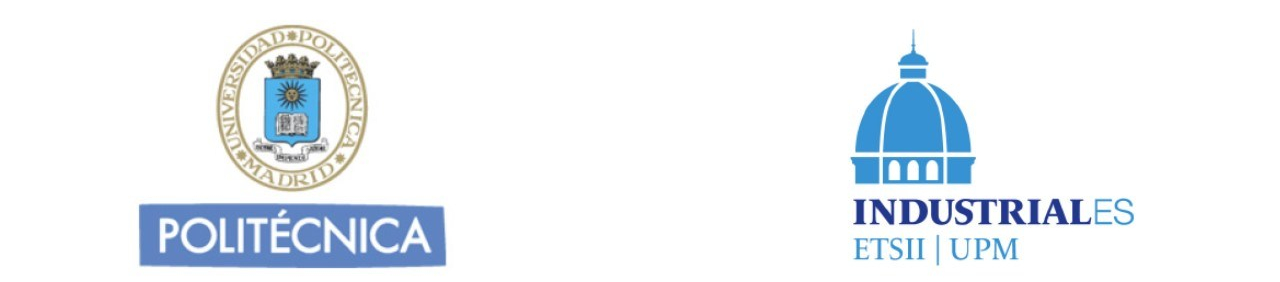

# Trabajo de Fin de Grado 
# Herramientas basadas en Jupyter Notebook para experimentos con reactores químicos
## Puesta en marcha de reactor CSTR y posteriór arranque de reactor BATCH. Función ODEINT.
© **Carmen Escobar Cristóbal**, **[Universidad Politécnica de Madrid](http://www.upm.es)**, 2023

El principal proposito de este <i>Notebook</i> es validar el <b>Método de Euler</b> empleado en el programa <b>CSTR+BATCH _EULER_NOTEBOOK FINAL</b> haciendo uso de la función odeint, la cual permite resolver numéricamente sistemas de ecuaciones diferenciales de primer orden. Esta función emplea modelos numéricos más avanzados que el método de Euler, los cuales permiten obtener una mayor precisión en los resultados. 

Con el código que se muestra a continuación, se obtiene la representación gráfica de la evolución en el tiempo de las concentraciones de las distintas especies que intervienen en la reacción de hidrólisis de acetato de etilo resolviendo los sistemas de ecuaciones diferenciales ordinarias con la función odeint.  

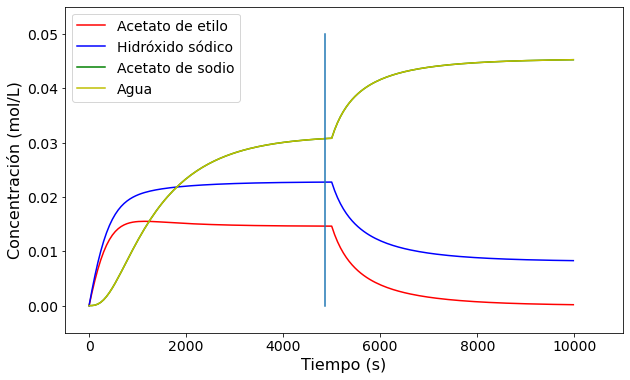

In [6]:
#Librerías
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Concentraciones y caudales iniciales
Ca0_t=0.1
Cb0_t=0.1
Ua0=0.000605
Ub0=0.000713

#Datos de entrada al reactor
U0=Ua0+Ub0
Ca0=Ca0_t*(Ua0/U0)
Cb0=Cb0_t*(Ub0/U0)

#OTROS
dt=60
Vreactor=1.45
τ=Vreactor/U0
T=294
k=1.22*(10**8)*np.exp(-6196.6/T)

#Concentraciones iniciales en el reactor
Ca=0
Cb=0
Cc=0
Cd=0

#Inicialización vector tiempo
t_array=0

def ODEfun(Yfuncvec, t, Vreactor , Ca0, Cb0, Ca, Cb, Cc, Cd):
    Ca= Yfuncvec[0]
    Cb= Yfuncvec[1]
    Cc= Yfuncvec[2]
    Cd= Yfuncvec[3]
    
    dCadt=(Ca0-Ca)/τ-k*Ca*Cb
    dCbdt=(Cb0-Cb)/τ-k*Ca*Cb
    dCcdt=-Cc/τ+k*Ca*Cb
    dCddt=-Cd/τ+k*Ca*Cb
    
    return np.array([dCadt, dCbdt, dCcdt, dCddt])

def ODEplot(Vreactor, Ca0, Cb0, Ca, Cb, Cc, Cd):
    
    t_array=range(0, 5000, dt)
    
    y0 = np.array([Ca, Cb, Cc, Cd])
    
    sol =  odeint(ODEfun, y0, t_array, (Vreactor, Ca0, Cb0, Ca, Cb, Cc, Cd))
        
    Ca = sol[:, 0]
    Cb = sol[:, 1]
    Cc = sol[:, 2]
    Cd = sol[:, 3]
    
    return np.array([t_array, Ca, Cb, Cc, Cd])

t_array, Ca, Cb, Cc, Cd=ODEplot(Vreactor, Ca0, Cb0, Ca, Cb, Cc, Cd)

Ca_ode2=Ca[len(Ca)-1]
Cb_ode2=Cb[len(Cb)-1]
Cc_ode2=Cc[len(Cc)-1]
Cd_ode2=Cd[len(Cd)-1]

def ODEfun2(Yfuncvec, t, Vreactor , Ca0, Cb0, Ca_ode2, Cb_ode2, Cc_ode2, Cd_ode2):
    
    Ca_ode2= Yfuncvec[0]
    Cb_ode2= Yfuncvec[1]
    Cc_ode2= Yfuncvec[2]
    Cd_ode2= Yfuncvec[3]
    
    dCadt=-k*Ca_ode2*Cb_ode2
    dCbdt=-k*Ca_ode2*Cb_ode2
    dCcdt=k*Ca_ode2*Cb_ode2
    dCddt=k*Ca_ode2*Cb_ode2
    
    return np.array([dCadt, dCbdt, dCcdt, dCddt])

def ODEplot2(Vreactor, Ca0, Cb0, Ca_ode2, Cb_ode2, Cc_ode2, Cd_ode2):
    
    t_array2=range(5000, 10000, dt) 
    
    y0 = np.array([Ca_ode2, Cb_ode2, Cc_ode2, Cd_ode2])
    
    sol =  odeint(ODEfun2, y0, t_array2, (Vreactor, Ca0, Cb0, Ca_ode2, Cb_ode2, Cc_ode2, Cd_ode2))
    Ca_ode2 = sol[:, 0]
    Cb_ode2 = sol[:, 1]
    Cc_ode2 = sol[:, 2]
    Cd_ode2 = sol[:, 3]
    
    return np.array([t_array2, Ca_ode2, Cb_ode2, Cc_ode2, Cd_ode2])

t_array2, Ca_ode2, Cb_ode2, Cc_ode2, Cd_ode2=ODEplot2(Vreactor, Ca0, Cb0, Ca_ode2, Cb_ode2, Cc_ode2, Cd_ode2)

#Inicializamos vectores
Ca_ode1=np.empty(len(Ca)-1, dtype=object)
Cb_ode1=np.empty(len(Cb)-1, dtype=object)
Cc_ode1=np.empty(len(Cc)-1, dtype=object)
Cd_ode1=np.empty(len(Cd)-1, dtype=object)
t_array1=np.empty(len(t_array)-1, dtype=object)

long_Ca_ode1=len(Ca_ode1)
long_Cb_ode1=len(Cb_ode1)
long_Cc_ode1=len(Cc_ode1)
long_Cd_ode1=len(Cd_ode1)
long_t_array1=len(t_array1)

n=0
m=0

while(n!=long_Ca_ode1):
    if(n<long_Ca_ode1):
        Ca_ode1[m]=Ca[n]
        m=m+1
        n=n+1

n=0
m=0

while(n!=long_Cb_ode1):
    if(n<long_Cb_ode1):
        Cb_ode1[m]=Cb[n]
        m=m+1
        n=n+1
n=0
m=0

while(n!=long_Cc_ode1):
    if(n<long_Cc_ode1):
        Cc_ode1[m]=Cc[n]
        m=m+1
        n=n+1

n=0
m=0

while(n!=long_Cd_ode1):
    if(n<long_Cd_ode1):
        Cd_ode1[m]=Cd[n]
        m=m+1
        n=n+1
n=0
m=0

while(n!=long_t_array1):
    if(n<long_t_array1):
        t_array1[m]=t_array[n]
        m=m+1
        n=n+1

Ca_total=np.concatenate((Ca_ode1, Ca_ode2))
Cb_total=np.concatenate((Cb_ode1, Cb_ode2))
Cc_total=np.concatenate((Cc_ode1, Cc_ode2))
Cd_total=np.concatenate((Cd_ode1, Cd_ode2))
t=np.concatenate((t_array1, t_array2))

plt.figure(figsize=(10,6))
plt.plot(t, Ca_total, 'r-',label="Acetato de etilo")
plt.plot(t, Cb_total,'b-', label="Hidróxido sódico")
plt.plot(t, Cc_total,'g-', label="Acetato de sodio")
plt.plot(t, Cd_total,'y-', label="Agua")


plt.legend(fontsize=14)
plt.xlim(-500,11000)
plt.ylim(-0.005, 0.055)
plt.xlabel("Tiempo (s)", fontsize=16)
plt.ylabel("Concentración (mol/L)", fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

estacionario=False
Ca_anterior=100
t_estacionario=0
i_f=len(Ca_total)
for i in range(1, i_f):
    if not estacionario: 
        if((abs((Ca_total[i]-Ca_anterior)/Ca_total[i]))<1.5e-4):
            estacionario=True
            t_estacionario=i*dt
        else:
            Ca_anterior=Ca_total[i]
            
if estacionario:       
    t_f=[t_estacionario, t_estacionario]
    y=[0, 0.05]
    plt.plot(t_f, y)

plt.show()